In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [7]:
# pip install openpyxl

     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
     ---- -------------------------------- 30.7/250.0 kB 220.2 kB/s eta 0:00:01
     ------ ------------------------------ 41.0/250.0 kB 245.8 kB/s eta 0:00:01
     ---------------- ------------------- 112.6/250.0 kB 547.6 kB/s eta 0:00:01
     -------------------------------------  245.8/250.0 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 250.0/250.0 kB 1.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
nswmap = pd.read_excel('../data/nsw-site-location-and-details.xlsx')
print(nswmap.shape)
nswmap.head(3)

(2255, 12)


,Site2,Site_distance,Community,Latitude,Longitude,Easting,Northing,Zone,Datum,Location name,Tenure,Date sampled
0,CYP_001,CYP_001_000,Cypress pine,-32.314901,145.820500,6424048,388969,55,MGA94,Bedooba State Conservation Area,National Park,2013-09-11
1,CYP_001,CYP_001_050,Cypress pine,-32.314476,145.820346,6424095,388954,55,MGA94,Bedooba State Conservation Area,National Park,2013-09-11
2,CYP_001,CYP_001_100,Cypress pine,-32.314051,145.820182,6424142,388938,55,MGA94,Bedooba State Conservation Area,National Park,2013-09-11


In [9]:
nswmap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2255 entries, 0 to 2254
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Site2          2255 non-null   object        
 1   Site_distance  2255 non-null   object        
 2   Community      2255 non-null   object        
 3   Latitude       2255 non-null   float64       
 4   Longitude      2255 non-null   float64       
 5   Easting        2255 non-null   int64         
 6   Northing       2255 non-null   int64         
 7   Zone           2255 non-null   int64         
 8   Datum          2255 non-null   object        
 9   Location name  2255 non-null   object        
 10  Tenure         2255 non-null   object        
 11  Date sampled   2255 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 211.5+ KB


In [10]:
nswmap['geometry'] = nswmap.apply(lambda x: Point((x.Longitude, 
                                                         x.Latitude)), 
                                        axis=1)
nswmap.head(3)

,Site2,Site_distance,Community,Latitude,Longitude,Easting,Northing,Zone,Datum,Location name,Tenure,Date sampled,geometry
0,CYP_001,CYP_001_000,Cypress pine,-32.314901,145.820500,6424048,388969,55,MGA94,Bedooba State Conservation Area,National Park,2013-09-11,POINT (145.820500115668 -32.3149014417796)
1,CYP_001,CYP_001_050,Cypress pine,-32.314476,145.820346,6424095,388954,55,MGA94,Bedooba State Conservation Area,National Park,2013-09-11,POINT (145.820346292351 -32.3144760386447)
2,CYP_001,CYP_001_100,Cypress pine,-32.314051,145.820182,6424142,388938,55,MGA94,Bedooba State Conservation Area,National Park,2013-09-11,POINT (145.820181849289 -32.3140505360327)


In [11]:
nswmap = gpd.GeoDataFrame(nswmap, 
                           crs = 'EPSG:4326', 
                           geometry = nswmap['geometry'])

In [12]:
nswmap.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
type(nswmap)

geopandas.geodataframe.GeoDataFrame

<Axes: >

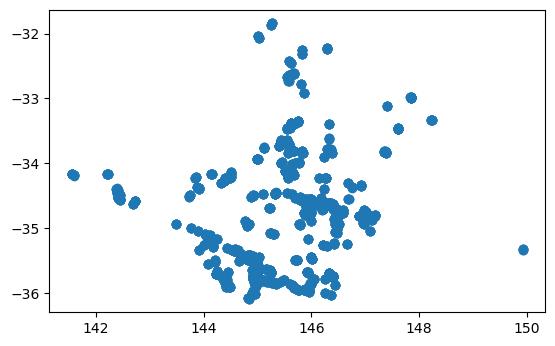

In [14]:
nswmap.plot()